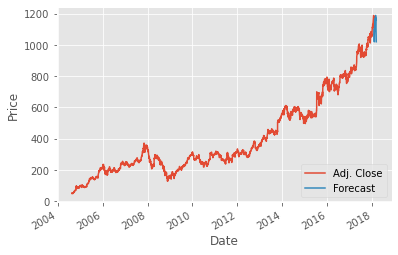

In [83]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

quandl.ApiConfig.api_key = "UBnFfoDAGSeyCxDKWfg2"
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Low']*100
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999,inplace = True)
forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

#feature
X = np.array(df.drop(['label'],1))
X= preprocessing.scale(X)

X_lately = X[-forecast_out:]
X= X[:-forecast_out]


df.dropna(inplace=True)
#label

Y = np.array(df['label'])



X_train, X_test, Y_train, Y_test =  model_selection.train_test_split(X,Y,test_size = 0.2)
#classifier
#clf = LinearRegression(n_jobs= -1)
#clf = svm.SVR(kernel = 'poly')
#clf.fit(X_train, Y_train)
#with open ('linearregression.pickle','wb') as f:
   # pickle.dump(clf,f)
    
pickle_in = open('linearregression.pickle','rb')

clf = pickle.load(pickle_in)

confidence= clf.score(X_test, Y_test)

forecast_set = clf.predict(X_lately)

#print(forecast_set, confidence, forecast_out)

df['Forecast'] = np.nan
last_day = df.iloc[-1].name
last_unix = last_day.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix +=one_day
    df.loc[next_date] = [np.nan for _ in range (len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [3354, 3389]

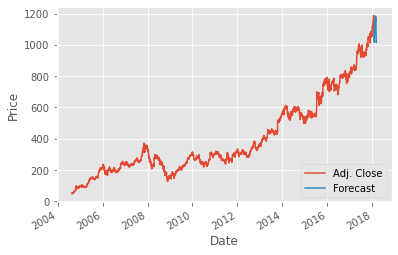